# Importing Required Library for performing EDA, Data Wrangling and data Cleaning

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\erkai\\Downloads\\avocado.csv 2\\avocado.csv")

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])

No of Rows: 18249
No of Columns: 14


In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Statistical Analysis

# Data Integrity Check

Since dataset is large, Let check for any entry which is repeated or duplicated in dataset at same date.

In [8]:
# This will check the duplicate data for all columns.

df.duplicated().sum()

0

# Missing value check

<Axes: >

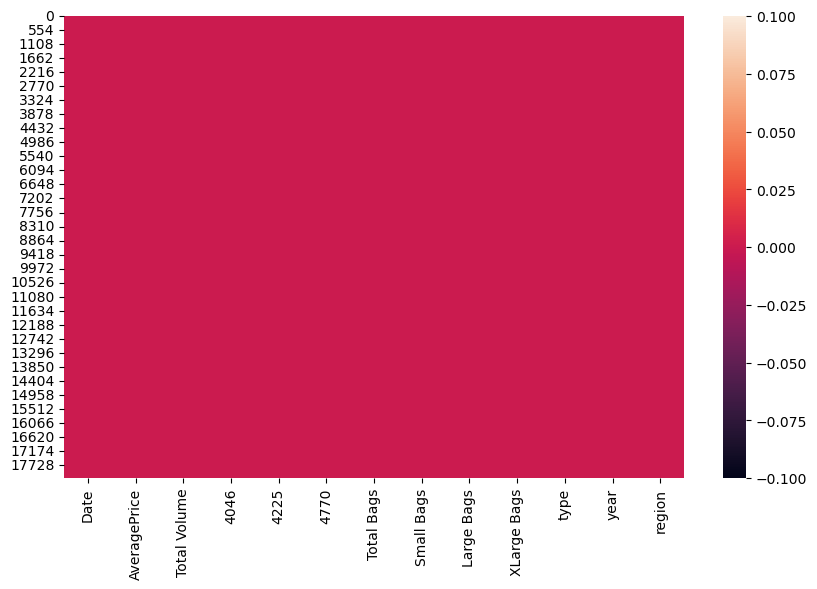

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [10]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

              Missing Values  % Missing data
Date                       0             0.0
AveragePrice               0             0.0
Total Volume               0             0.0
4046                       0             0.0
4225                       0             0.0
4770                       0             0.0
Total Bags                 0             0.0
Small Bags                 0             0.0
Large Bags                 0             0.0
XLarge Bags                0             0.0
type                       0             0.0
year                       0             0.0
region                     0             0.0


# Datatype Check

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


# Comment :

1.There are 13 features in data.

2.Region has object datatype.

3.Date by default data type is object which need to change to datetime datatype.

4.Other variable are float & int datatypes.

In [12]:
# Converting datatype of date column
df['Date']=pd.to_datetime(df.Date)

In [13]:
df['Date'].dtype

dtype('<M8[ns]')

# Statistical Matrix

<Axes: >

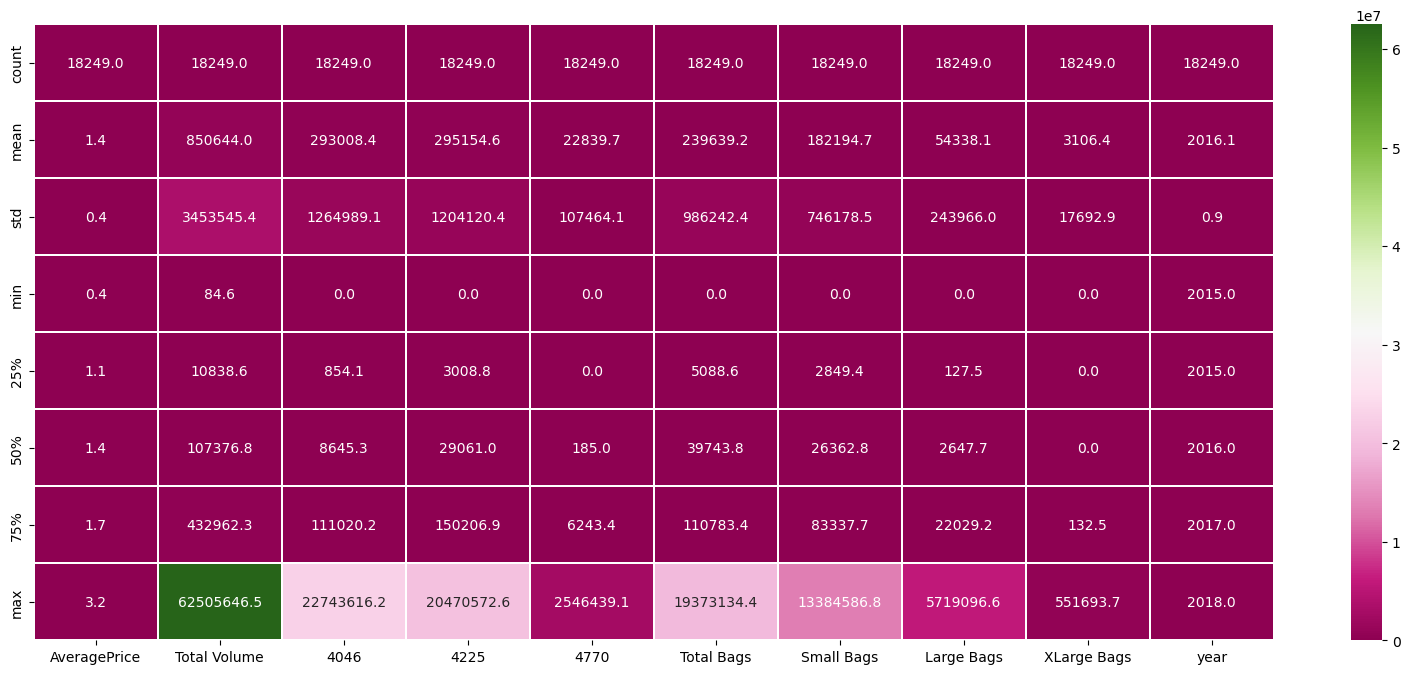

In [14]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [15]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.406,0.403,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013,3453545.355,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.425,1264989.082,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568,1204120.401,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.736,107464.068,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202,986242.399,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.687,746178.515,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088,243965.965,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.427,17692.895,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.148,0.940,2015.00,2015.00,2016.00,2017.00,2018.00


# Comment :

1.We can easily suspect that some of the features contain outliers after looking at 50% and max columns.

2.For most of columns have minimum value of zero.

3.Almost in all columns value of mean is greater than median. Data is right skewed.

4.For most of columns value of std. deviation is greater than mean i.e. data is spread.

# Lets do some Statistical Analysis. Start with find Average price of avocodo over the timeframe and according types

In [16]:
print("\033[1m"+'Minimum Price of Avocado :'+"\033[0m",df.AveragePrice.min(),'USD')
print("\033[1m"+'Maximum Price of avacado :'+"\033[0m",df.AveragePrice.max(),'USD')
print("\033[1m"+'Average Price of avacado :'+"\033[0m",df.AveragePrice.mean(),'USD')

Minimum Price of Avocado : 0.44 USD
Maximum Price of avacado : 3.25 USD
Average Price of avacado : 1.405978409775878 USD


Avacado varies from 0.44 USD To 3.25 USD with average price of 1.40 USD per unit

<Axes: title={'center': 'Distribution Price'}, xlabel='AveragePrice', ylabel='Density'>

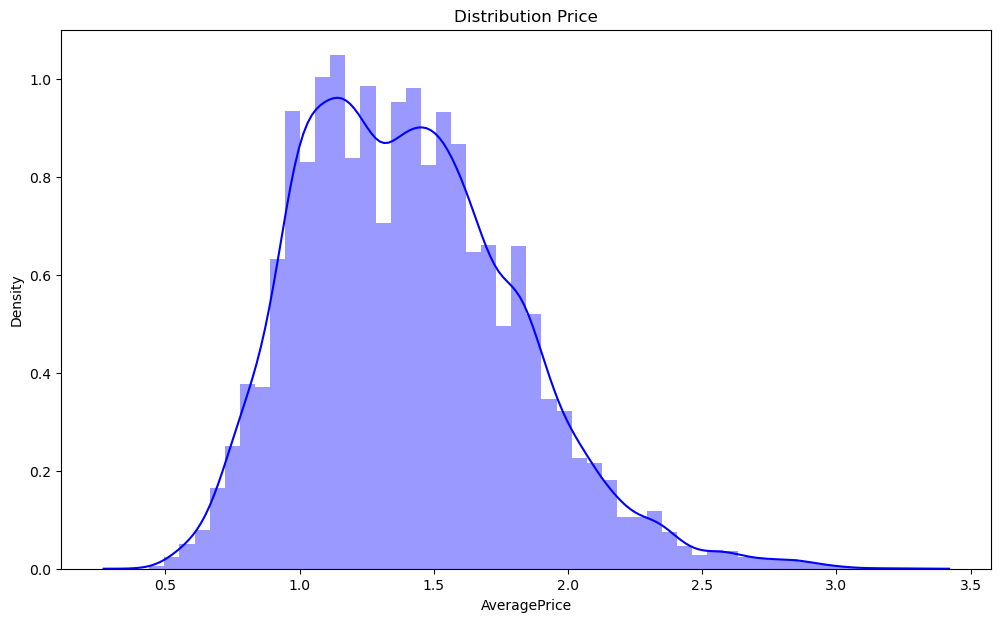

In [17]:
plt.figure(figsize=(12,7))
plt.title('Distribution Price')
sns.distplot(df["AveragePrice"], color='b')

In [18]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [19]:
df.groupby('type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

In [20]:
print("\033[1m"+'Percentage difference in price of avacado :'+"\033[0m",((1.65399-1.1580)/1.1580)*100,"%")

Percentage difference in price of avacado : 42.831606217616596 %


<Axes: xlabel='AveragePrice', ylabel='type'>

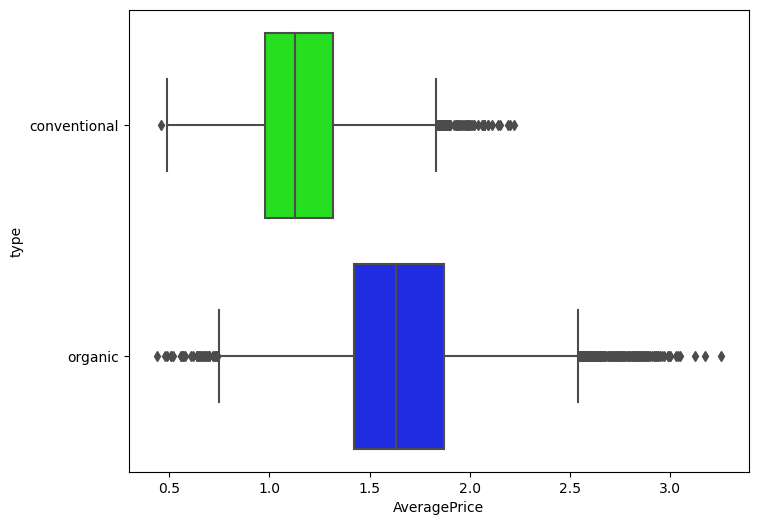

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(y="type", x="AveragePrice", data=df, palette = 'hsv')

# Comment: 

1.Oraganic Avocado is almost 43% more costlier than conventional Avacado.

2.We can see that Average Price of Organic Avocado is higher than Conventional Avocado.

3.This obvious as cultivation of organic avocado is expensive, time taking process demanding much effort & patience.Also health cautious and quality oriented people are willing to pay more price for it.

Before going deeper with Average price to gain more insight as it has lot more to explore, just let do quick check over volumetric sell of Avacado. Normal tendency of most people is they dont want to pay more price so most probably if such scenerio exist then it will be reflected in total sales.

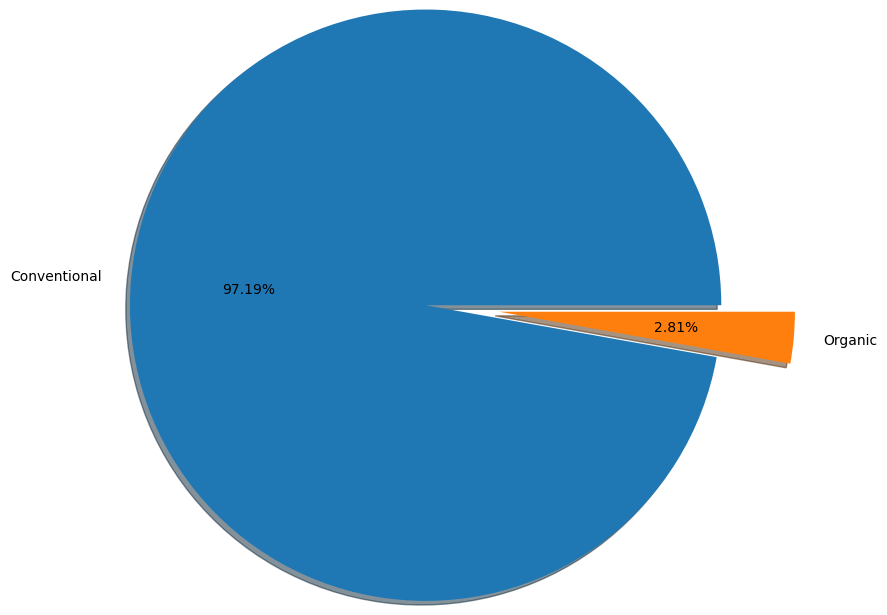

In [22]:
labels = 'Conventional','Organic',
fig, ax = plt.subplots()
ax.pie(df.groupby('type')['Total Volume'].mean(),labels = labels,radius =2,autopct = '%2.2f%%',explode=[0.3,0.2], shadow=True,)
plt.show()

In [23]:
df.groupby('type')['Total Volume'].mean()

type
conventional    1.653213e+06
organic         4.781121e+04
Name: Total Volume, dtype: float64

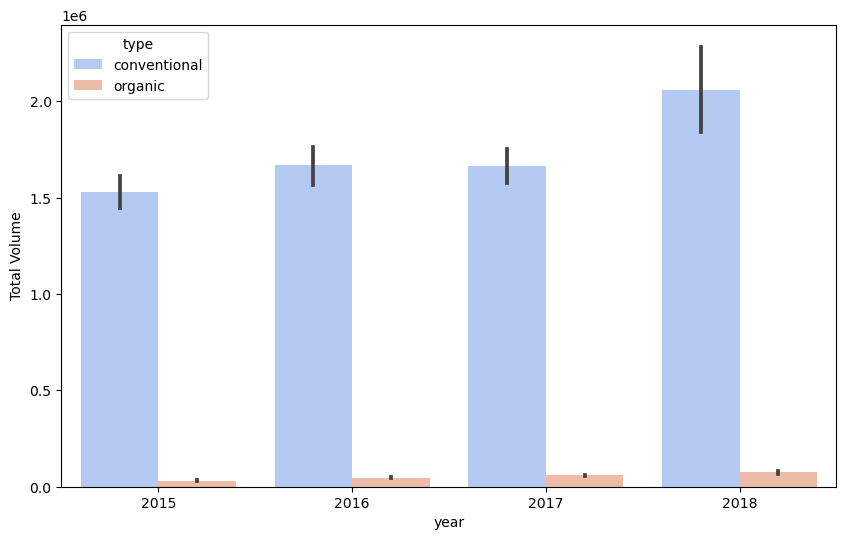

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x='year', y='Total Volume', hue='type',data=df, palette='coolwarm',ci=68)
plt.show()

# Comment -

1.The sell of organic avacodo is less than 3 %.

2.Conventional Avacado are in more demand.

3.Barplot confirm same thing in yearwise sales volume.

The Average price varies over year and season , lets dive to get some more insight over it.

In [25]:
pd.crosstab([df.type,df.year],df.AveragePrice, margins= True).style.background_gradient(cmap='summer_r')

In [26]:
df.groupby(['year','type'])['AveragePrice'].agg([min,max,np.mean,np.median])

min   max      mean  median
year type                                      
2015 conventional  0.49  1.59  1.077963    1.08
     organic       0.81  2.79  1.673324    1.67
2016 conventional  0.51  2.20  1.105595    1.08
     organic       0.58  3.25  1.571684    1.53
2017 conventional  0.46  2.22  1.294888    1.30
     organic       0.44  3.17  1.735521    1.72
2018 conventional  0.56  1.74  1.127886    1.14
     organic       1.01  2.30  1.567176    1.55

# Comment :

1.Oraganic Avocado is 40-50% costlier than conventional avacado.

2.Avacodo got price hike in year 2017 as result of some reason may be inflation,shortage, more wages.

3.Except 2017 each year their is incresase in price of avacado.

In [27]:
df.groupby(['year','type'])['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags'].agg([sum])

Total Volume    Total Bags    Small Bags    Large Bags  \
                            sum           sum           sum           sum   
year type                                                                   
2015 conventional  4.296599e+09  7.481009e+08  6.194886e+08  1.231692e+08   
     organic       8.886943e+07  2.409134e+07  1.519414e+07  8.897192e+06   
2016 conventional  4.690250e+09  1.398101e+09  1.064426e+09  3.136371e+08   
     organic       1.306401e+08  6.505765e+07  4.206845e+07  2.298920e+07   
2017 conventional  4.766166e+09  1.541193e+09  1.145835e+09  3.713655e+08   
     organic       1.681399e+08  1.050962e+08  7.711715e+07  2.797352e+07   
2018 conventional  1.334206e+09  4.593696e+08  3.344334e+08  1.177311e+08   
     organic       4.853227e+07  3.216630e+07  2.630799e+07  5.852903e+06   

                   XLarge Bags  
                           sum  
year type                       
2015 conventional   5443128.28  
     organic              0.00  
2016 conventional  20038284.84  
     organic              0.00  
2017 conventional  23991658.41  
     organic           5513.93  
2018 conventional   7205184.07  
     organic           5407.80

# Comment :

1.Sales of Avacado in 2017 is more than 2016 so price hike is may be as result of increase in demand or some supply chain issue.

2.sales in turn Demand is also increase over time.

3.30 % increase in sale of organic avocado in 2017 compare to 2016, even when it is almost 50% costlier than conventional type.

4.There is also growth in demand of conventional type avocado year-wise but rate of growth of demand comparelative less than organic type. May be people becoming more health oriented.

5.XLarge Bags sales increase rapidly in 2017 compare to 2015.

6.If we look at trend from 2015 customer start buying buying Large or Xlarge bags compare to small bags in case of Conventional type. May be quantity & discount offer by shop may be playing role here.

7.People choosing small bags of organic avocado over large.Price factor playing here.

In [28]:
df.sort_values(by=['Date'], inplace=True, ascending=True)

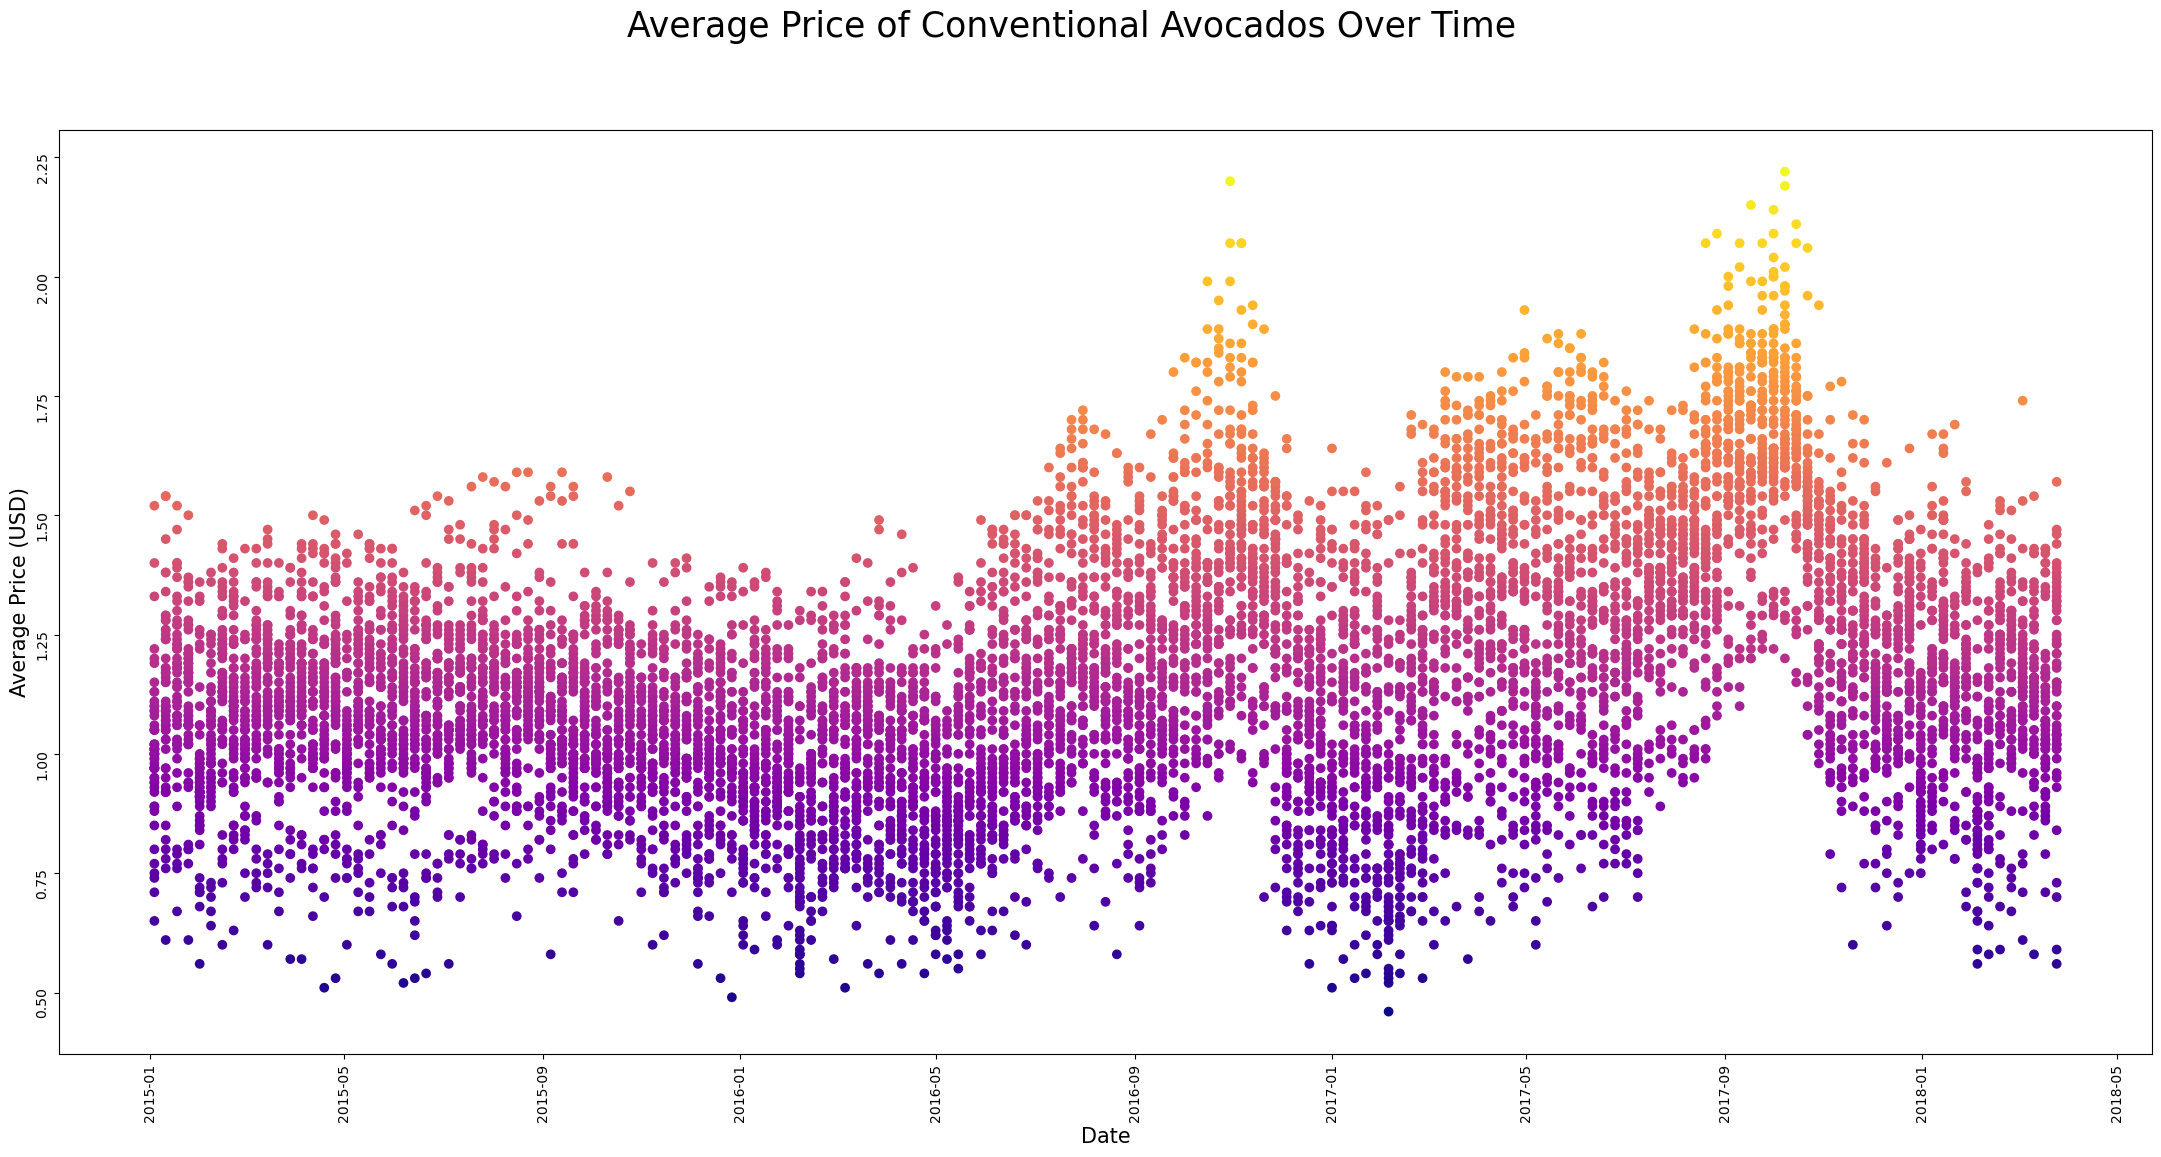

In [29]:
# Average price of Conventional Avocados over time

mask = df['type']== 'conventional'
plt.rc('figure', titlesize=20)
fig = plt.figure(figsize = (27, 12))
fig.suptitle('Average Price of Conventional Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter( dates,avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15,)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
ax.set_xlim()
ax.tick_params(labelrotation=90)

plt.show()

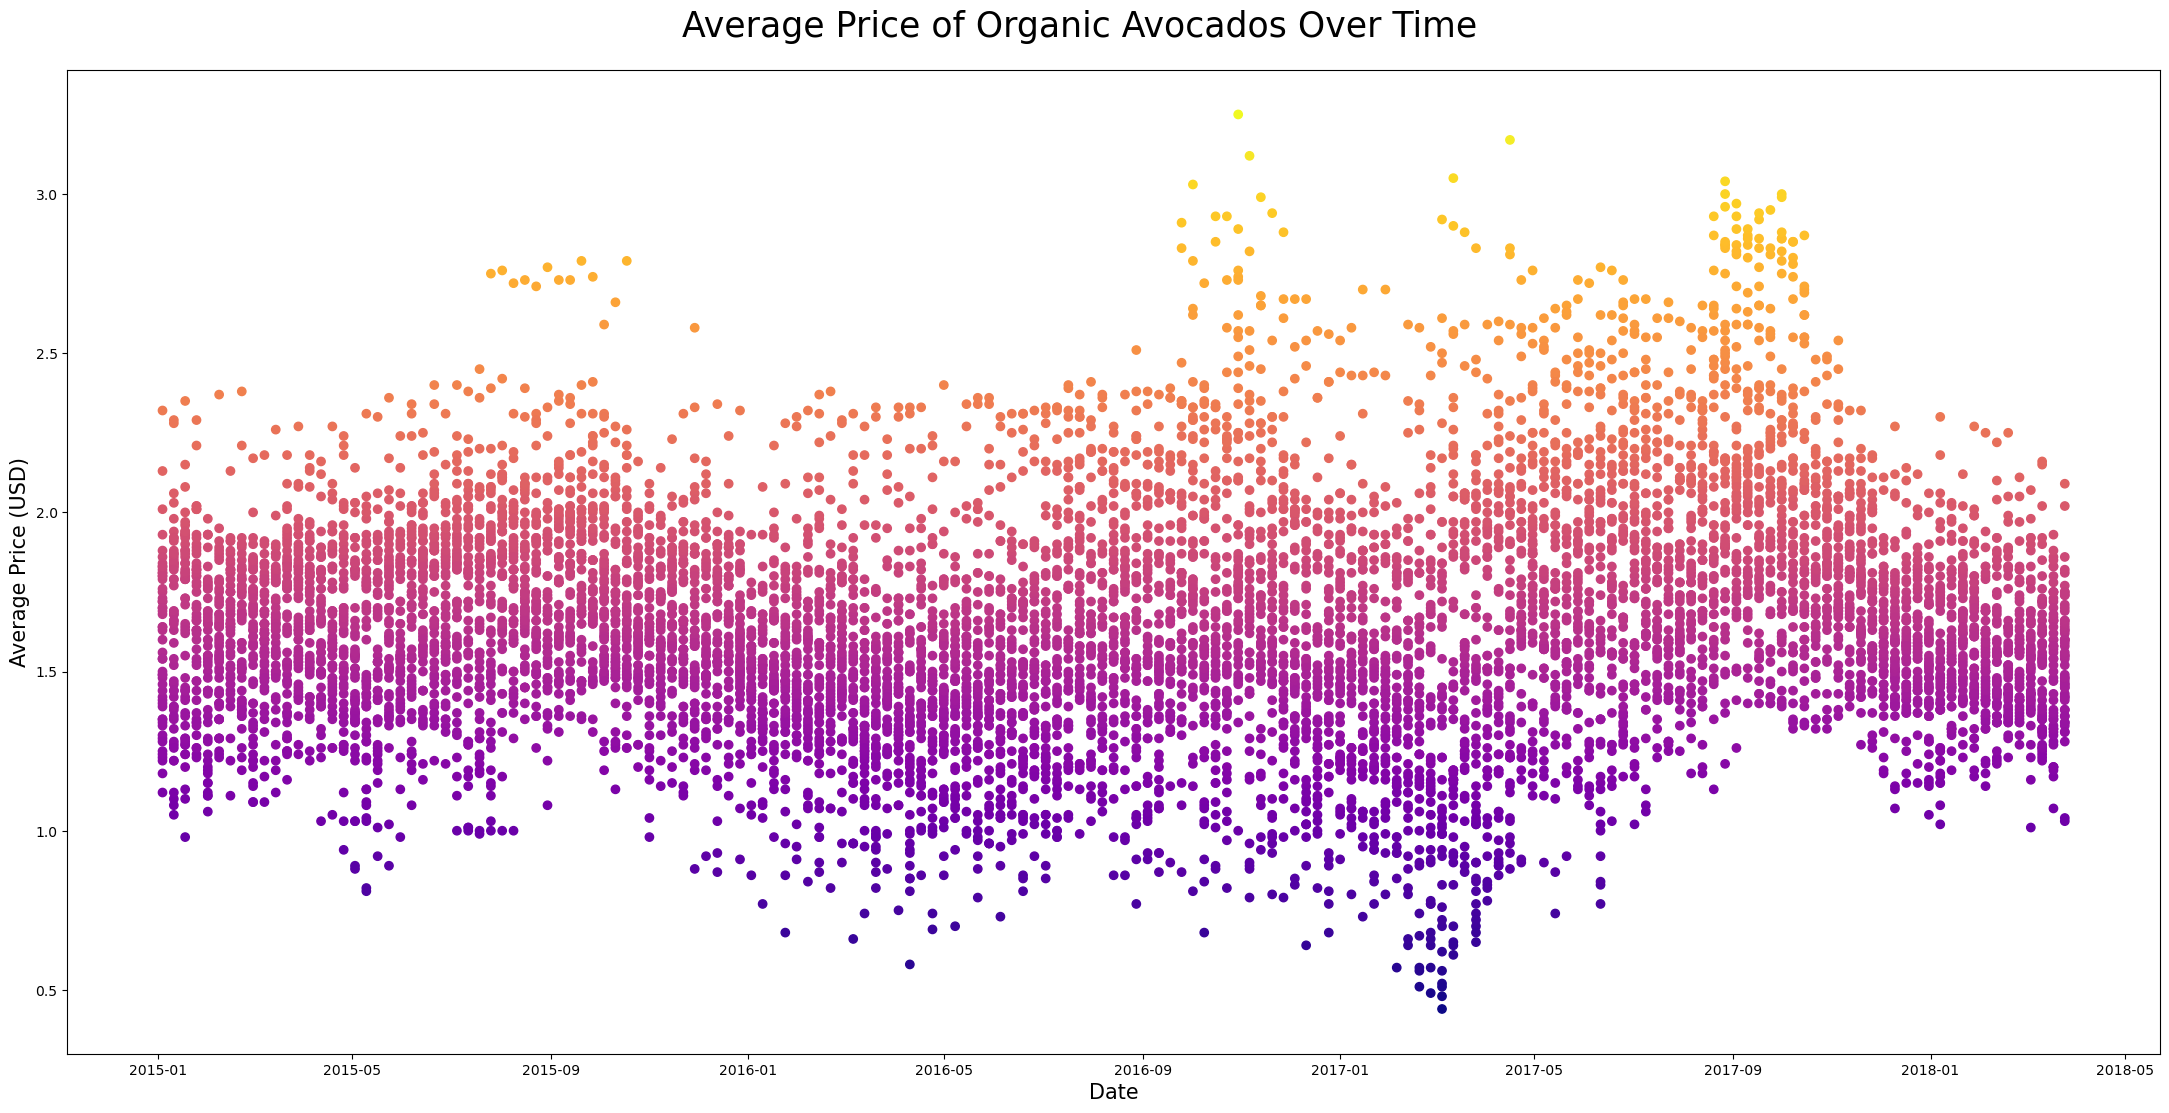

In [30]:
# Average price of Organic Avocados over time
mask = df['type']== 'organic'
plt.rc('figure', titlesize=20)
fig = plt.figure(figsize = (27, 12))
fig.suptitle('Average Price of Organic Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter(dates,avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.xlim()
plt.show()

In [31]:
df.groupby(['region'])['Total Volume','AveragePrice'].agg([sum])

,Total Volume,AveragePrice
,sum,sum
region,,
Albany,1.606780e+07,527.63
Atlanta,8.860512e+07,452.23
BaltimoreWashington,1.347139e+08,518.57
Boise,1.441319e+07,455.67
Boston,9.727398e+07,517.44
BuffaloRochester,2.296247e+07,512.69
California,1.028982e+09,471.62
Charlotte,3.555554e+07,542.84


# EDA

In [32]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [33]:
df2=df.copy()

In [34]:
# Creating Datframe for numeric features
df2.drop(['Date','type','region','year'], axis=1, inplace=True)

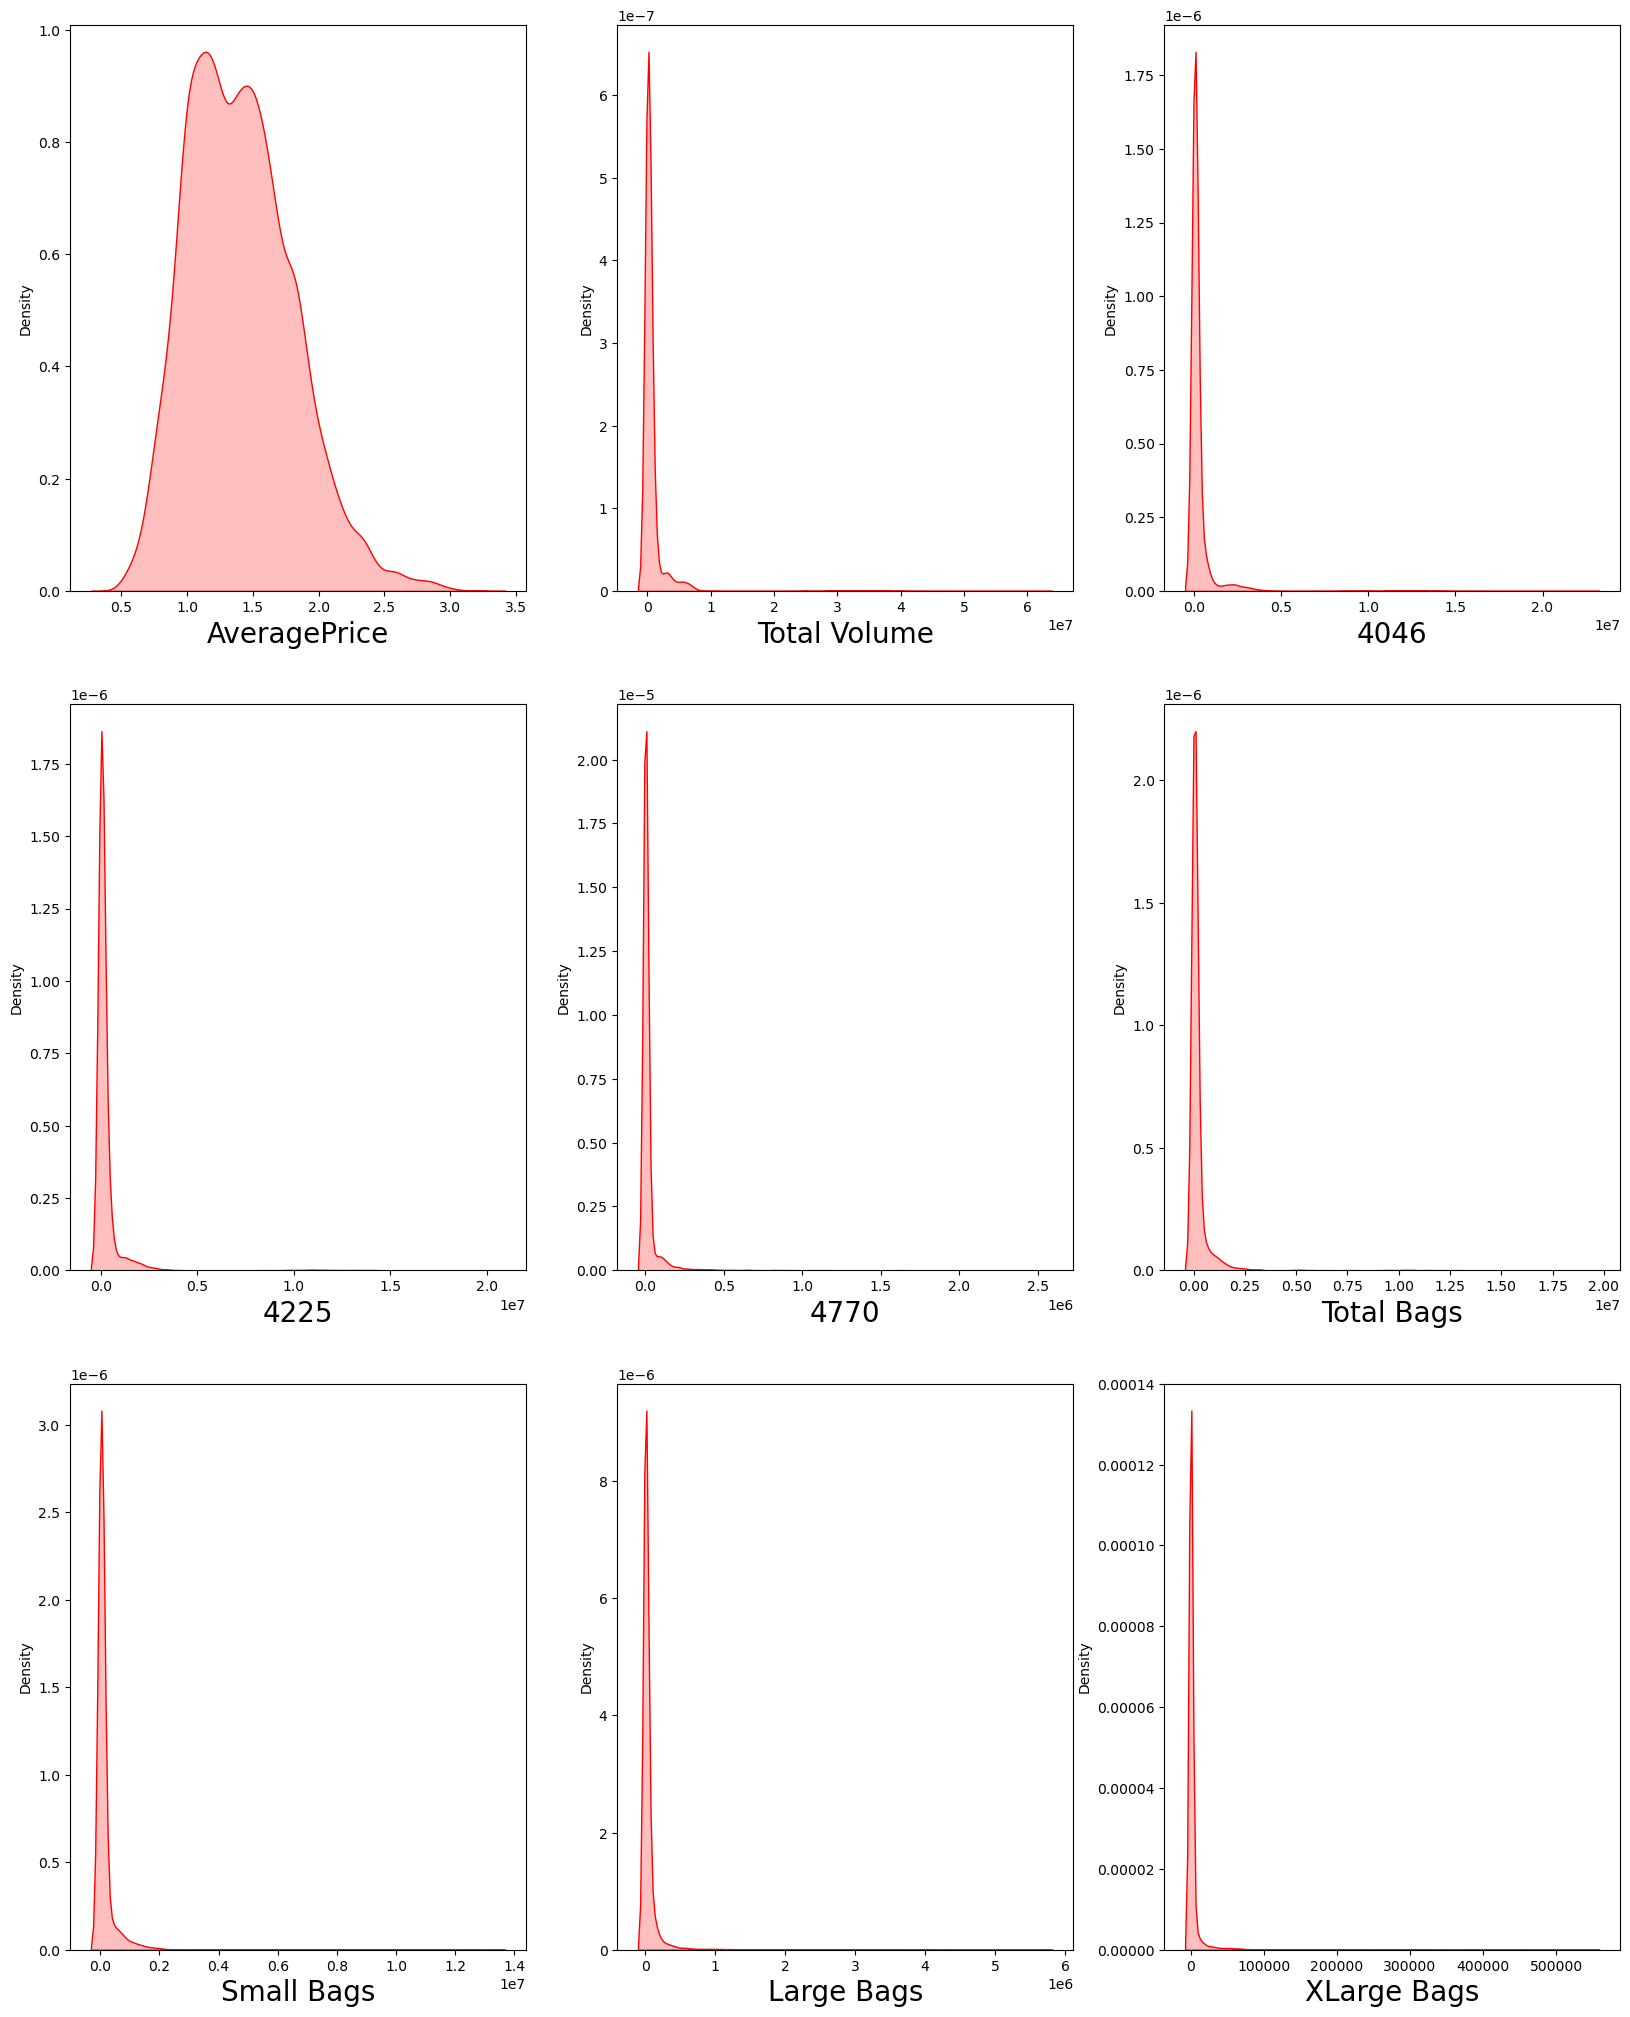

In [35]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df2[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

1.We can see skewed data with presence of outliers with sharp peak.

2.Most of the plots are right skewed, having value of mean very small compare to std. deviation & median.

3.This is resulting in sharp high peak.Very few data points are present as we move away from zero to other end of x-axis

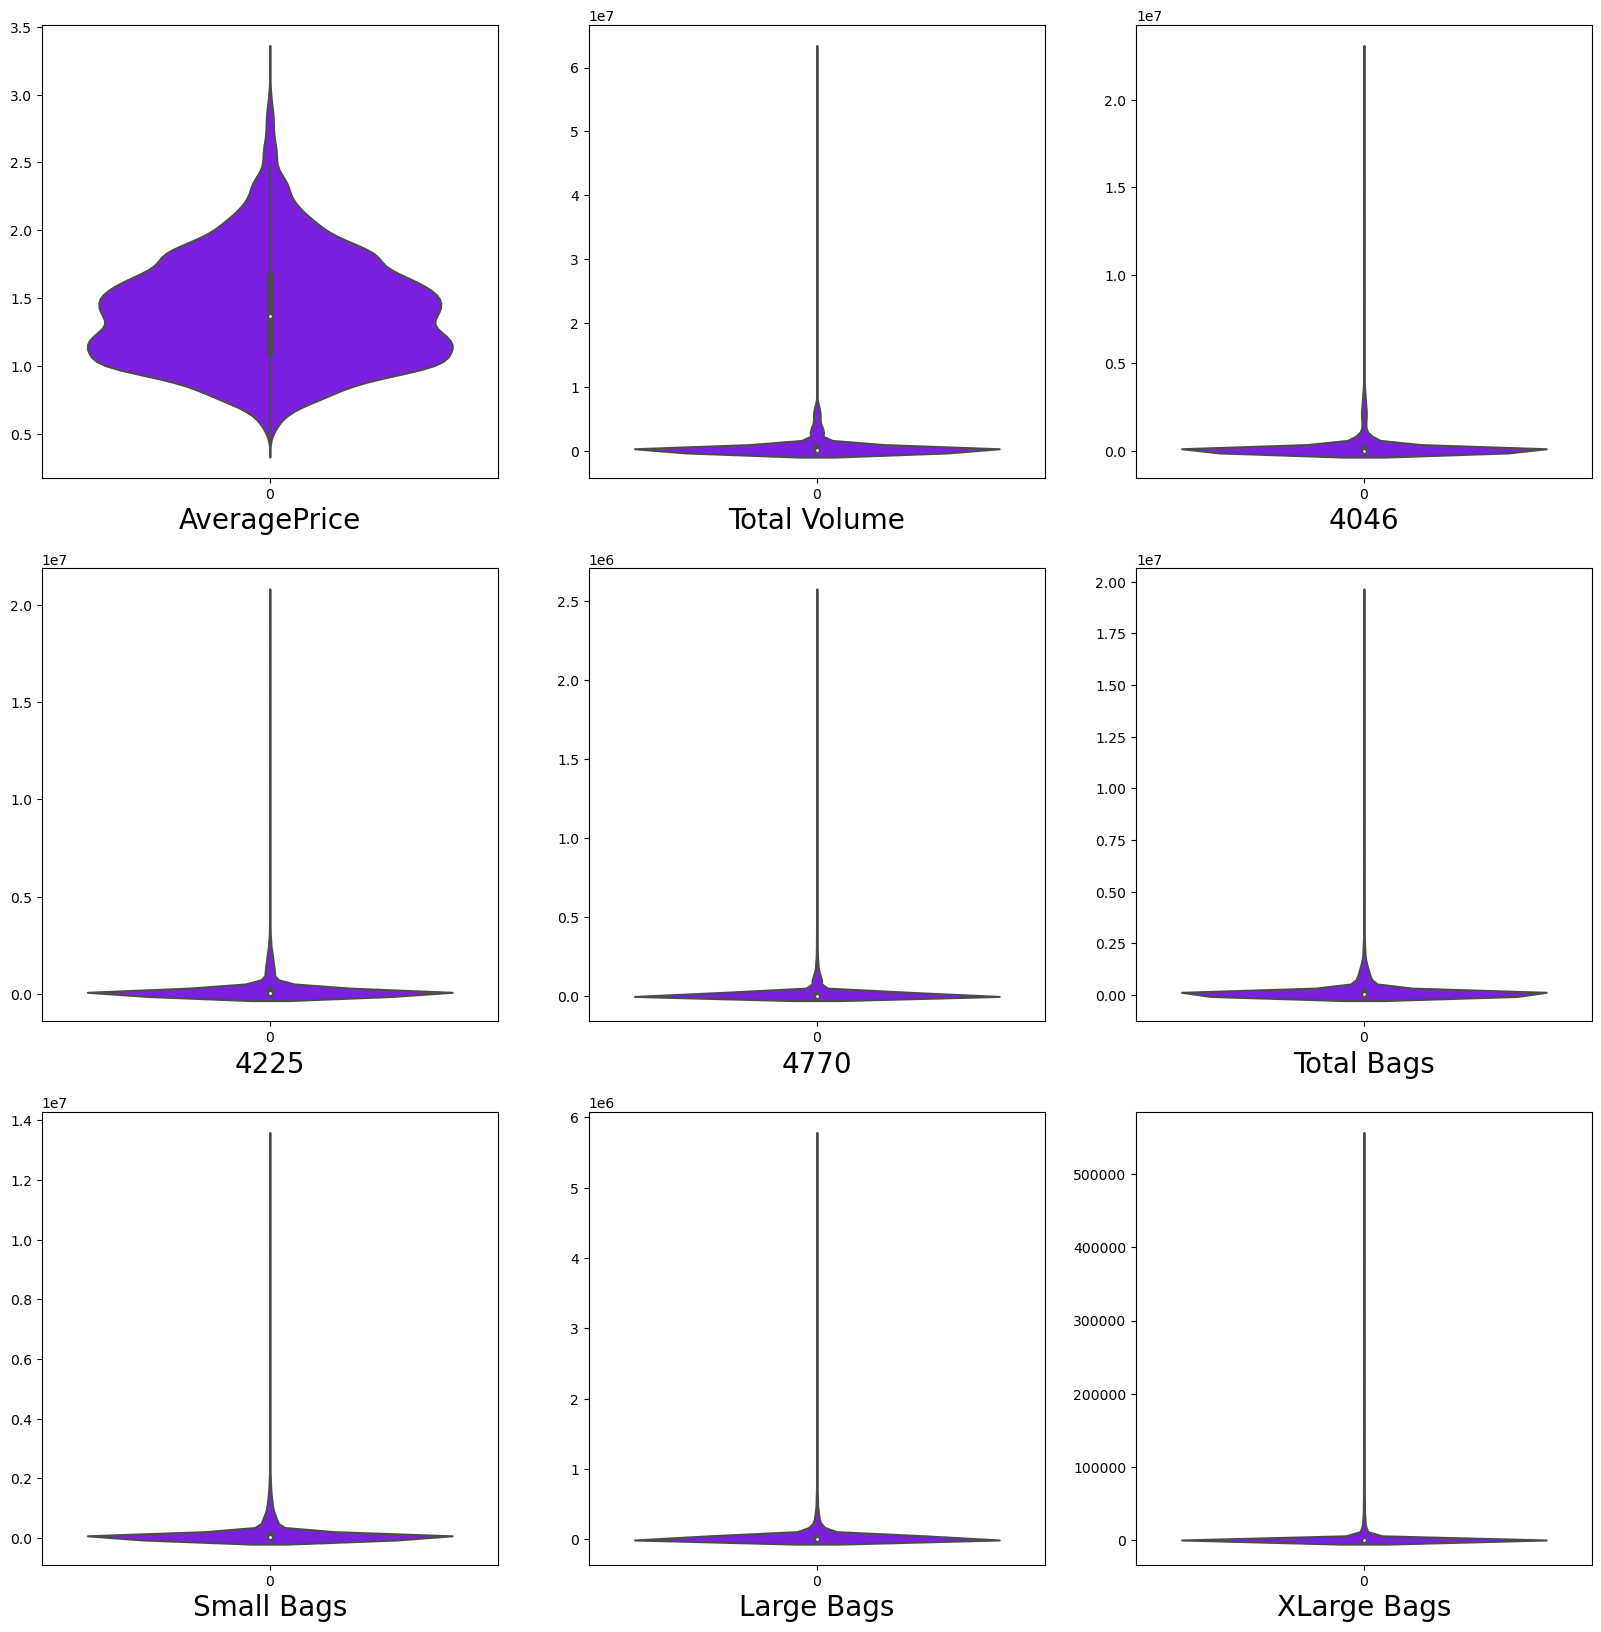

In [36]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
for column in df2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.violinplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

1.For Majority Average price is in range of 1 to 1.5.

2.Rest of Violin plot show same story as distribution plot.

Avacado availability and price also vary over the year according to seasonal changes.Lets check the variation Avg price and sales volume over each month.

For that purpose let create another copy dataframe and then split date column into Year,Month and Day.

In [37]:
df=pd.read_csv('C:\\Users\\erkai\\Downloads\\avocado.csv 2\\avocado.csv')

In [38]:
# Copy of original dataframe
df3=df.copy()

In [39]:
df3['Year'], df3['Month'], df3['Day'] = df3['Date'].str.split('-').str
df3.drop(columns=['Date','year'], inplace=True)
df3

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,02,04
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,01,28
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,01,21
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,01,14


In [40]:
# Converting Datetime datatypes to int
df3['Year']=df3['Year'].astype(int)
df3['Month']=df3['Month'].astype(int)
df3['Date']=df3['Day'].astype(int)

In [41]:
df3.drop(columns=['Day'],axis=1, inplace=True)

In [42]:
df3.drop(columns=['Date'],axis=1, inplace=True)

In [43]:
df3.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11


# Univariate analysis of feature using date, months, year

In [44]:
# Checking unique values and Yearwise total No of sale entry
df3['Year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64

In [45]:
sns.countplot('Year',data= df3, hue=)

SyntaxError: invalid syntax (28064390.py, line 1)

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x='Month', data=df3, palette="spring")

In [ ]:
df3['Month'].value_counts().max()

In [ ]:
df3['Month'].value_counts().min()

Maximum sales lead comes in month of Jan, Feb, March

Maximum sales demand of Avacodo is in month of Jan (1944 lead) & Minimum sales demand of Avacoda is in month of June

# Checking Month-Wise Variation in Average Price


In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x="Month", y="AveragePrice", hue='type', data=df3)
plt.show()

In [ ]:
df3.groupby(['Month','type'])['AveragePrice'].agg([np.mean]).T

In [ ]:
plt.figure(figsize=(10,10))
sns.catplot(x = "Month", y = "AveragePrice", kind ='violin', data=df3, linewidth=2)
plt.show()

# Comment :

In month of September and October Price of Conventional type of Avacado is comparatively higher than other months.

There is not much upheaval in Organic type Avacoda over year peroid.

We can see that variation in mean price values in above groupby table, which confirm what we got from barplot.

Now Let Compare Countplot of Sales Entries and Barplot of Avg Price Monthwise.

In first sight we can see in period of Augest to October price high & in that same time period sales order are minimum.

Opposite of it true in duration of Jan to March.

This variation applicable to conventional type while we cannot find such any relation in case of Organic avacado.

In conclusion when Average sale price of 'Conventional Avacado' is high in same time less sales order are observe. Inshort Customer are less interested in buying avacado at high Price.

# we have to explore region feature.

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['region'],y=df['AveragePrice'], data=df3)
plt.title(f'Bar Plot for regions')
plt.xticks(rotation=90)
plt.show()


In [ ]:
region = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=df, palette="Set1")
plt.show()

In [ ]:
df.groupby(['region'])['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags'].agg([np.mean])

Comment on feature Region:

Maximum sales Volume is in South Central While Minimum Sales Volume is in Syracuse.

Maximum Average Price is in SanFrancisco and Minimum Average Sale price is in Houston.

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
y = df[['4046','4225','4770']]
X = df['Year']
for col in y:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(x=Year, y=col, alpha=0.8)
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
y = df[['Small Bags','Large Bags','XLarge Bags']]
X = df['year']
for col in y:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(x='Year', y=col, alpha=0.8)
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()